Show an example of how rolling cadence changes the distribution of visits

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metricBundles as metricBundles

In [2]:
outDir ='Rolling'
dbFile = 'ops2_1098_sqlite.db'
opsimdb = utils.connectOpsimDb(dbFile)
resultsDb = db.ResultsDb(outDir=outDir)
nightLimits = (np.arange(3)+1)*365
nightLimits = np.append(nightLimits, 3653.)
nside = 64

In [3]:
# parameters for SNe
peaks = {'uPeak':25.9, 'gPeak':23.6, 'rPeak':22.6, 'iPeak':22.7, 'zPeak':22.7,'yPeak':22.8}
peakTime = 15
transDuration = peakTime+30 # Days

In [4]:
bundleList = []
plotDict ={}
pdL = [{'colorMin':0,'colorMax':100}, {'colorMin':40,'colorMax':100},
       {'colorMin':40,'colorMax':120},{'colorMin':200,'colorMax':400}]
sm = metrics.MedianMetric()
runName='ops2_1098'
for night,pd in zip(nightLimits,pdL):
    metric = metrics.CountMetric(col='expMJD')
    slicer = slicers.HealpixSlicer(nside=nside,lonCol='ditheredRA',latCol='ditheredDec')
    sql = 'filter = "r" and night < %i' % night
    bundleList.append(metricBundles.MetricBundle(metric,slicer,sql, plotDict=pd, 
                                                 summaryMetrics=sm, runName=runName))
    metric = metrics.InterNightGapsMetric(metricName='Median Inter-Night Gap')
    bundleList.append(metricBundles.MetricBundle(metric,slicer,sql, runName=runName,
                                                 plotDict={'colorMin':0,'colorMax':30, 'xMin':0,'xMax':30}))

    metric = metrics.TransientMetric(riseSlope= -2./peakTime, declineSlope=1.4/30., 
                                      transDuration=transDuration, peakTime=peakTime, surveyDuration=night/365.25, 
                                      nFilters=3, nPrePeak=3, nPerLC=2, **peaks)
    sql = '(filter="r" or filter="g" or filter="i" or filter="z") and night < %i' % (night)
    bundleList.append(metricBundles.MetricBundle(metric,slicer,sql, runName=runName,
                                                 plotDict={'colorMin':0,'colorMax':0.4}))

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


In [5]:
bd = metricBundles.makeBundlesDictFromList(bundleList)
bg =  metricBundles.MetricBundleGroup(bd, opsimdb,
                                      outDir=outDir, resultsDb=resultsDb)

Querying database with constraint (filter="r" or filter="g" or filter="i" or filter="z") and night < 730
Found 365651 visits
Running:  ['ops2_1098_TransientDetectMetric_r_or_g_or_i_or_z_and_night_lt_730_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database with constraint filter = "r" and night < 3653
Found 535139 visits
Running:  ['ops2_1098_Median_Inter-Night_Gap_r_and_night_lt_3653_HEAL', 'ops2_1098_Count_expMJD_r_and_night_lt_3653_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database with constraint (filter="r" or filter="g" or filter="i" or filter="z") and night < 3653
Found 1800492 visits
Running:  ['ops2_1098_TransientDetectMetric_r_or_g_or_i_or_z_and_night_lt_3653_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database with constraint filter = "r" and night < 365
Found 51413 visits
Running:  ['

Optimal bin calculation tried to make 12361 bins, returning 200
Optimal bin calculation tried to make 652 bins, returning 200



monopole: 12.9895  dipole: lon: 110.407, lat: -32.7612, amp: 1.52656
Plotting complete.
Plotting figures with filter = "r" and night < 730 sqlconstraint now.
monopole: 51.4864  dipole: lon: 69.4895, lat: -48.4893, amp: 9.03059

/Users/yoachim/lsst/DarwinX86/anaconda/2.2.0/lib/python2.7/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
Optimal bin calculation tried to make 1817 bins, returning 200



monopole: 16.4677  dipole: lon: -46.5211, lat: 79.0499, amp: 0.881225
Plotting complete.
Plotting figures with (filter="r" or filter="g" or filter="i" or filter="z") and night < 365 sqlconstraint now.
monopole: 0.140454  dipole: lon: 99.4932, lat: -12.6367, amp: 0.123658
Plotting complete.
Plotting figures with filter = "r" and night < 1095 sqlconstraint now.
monopole: 22.1345  dipole: lon: -165.39, lat: 85.9911, amp: 6.80146
monopole: 75.7337  dipole: lon: 54.094, lat: -41.677, amp: 12.6668
Plotting complete.
Plotting figures with (filter="r" or filter="g" or filter="i" or filter="z") and night < 1095 sqlconstraint now.
monopole: 0.0901619  dipole: lon: 81.3813, lat: -20.0463, amp: 0.0586078
Plotting complete.


Optimal bin calculation tried to make 3307 bins, returning 200


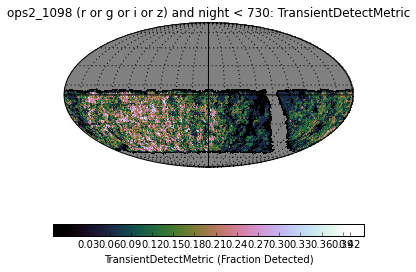

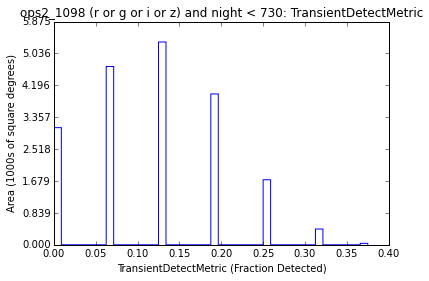

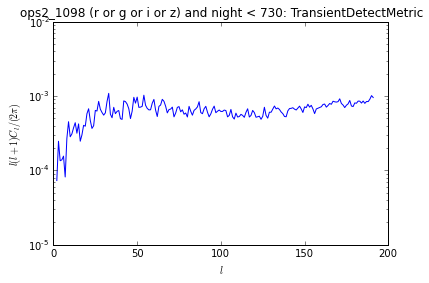

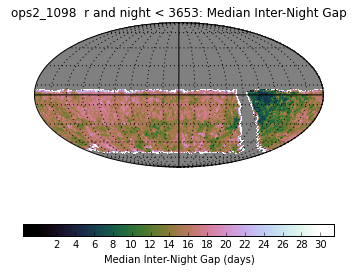

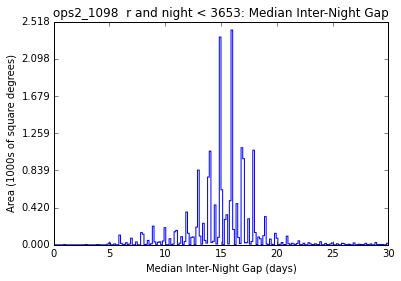

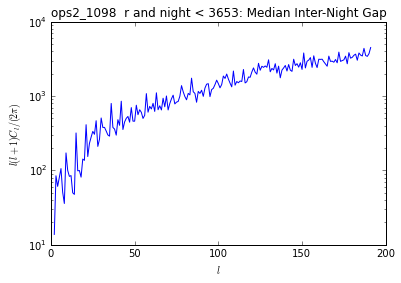

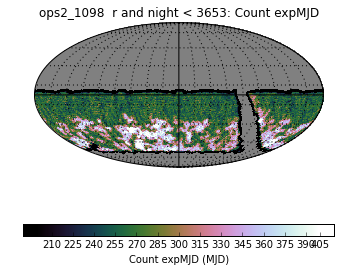

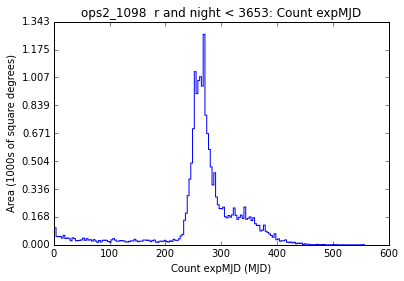

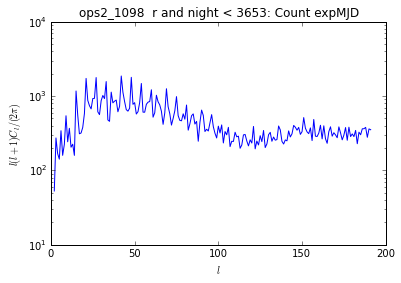

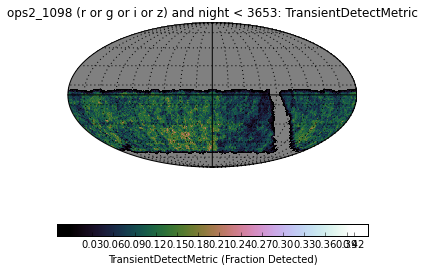

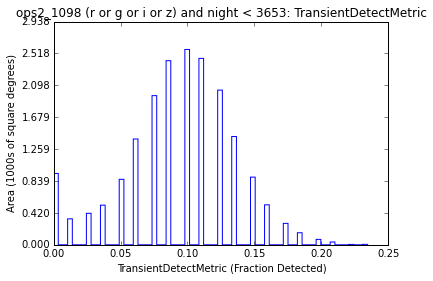

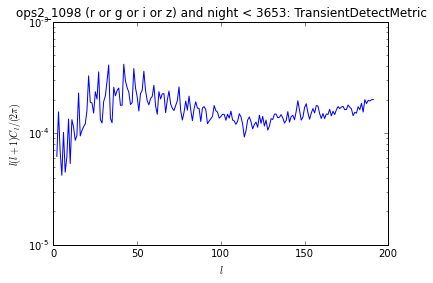

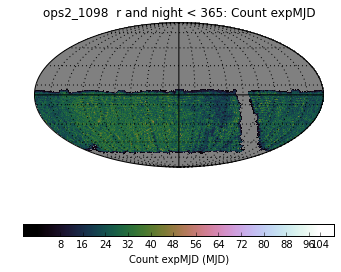

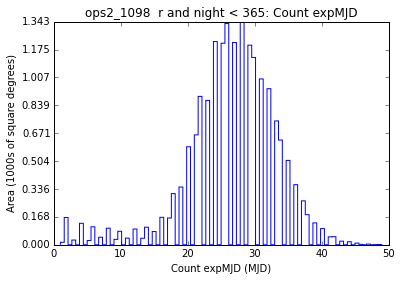

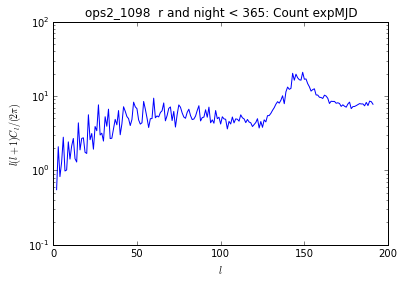

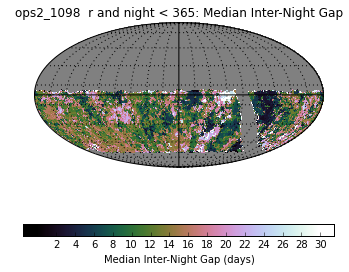

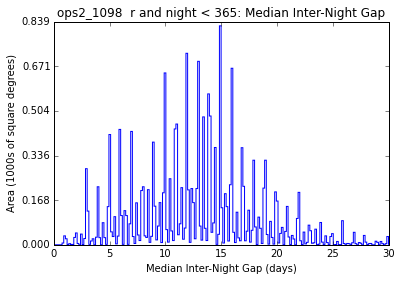

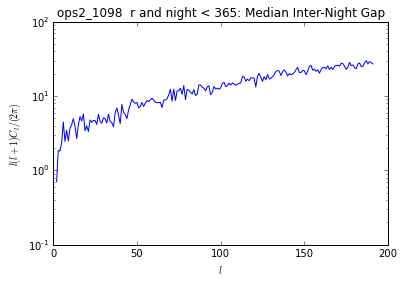

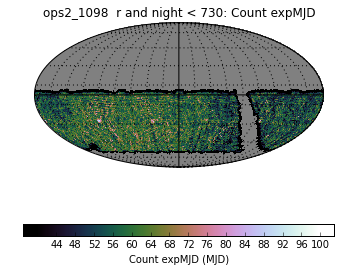

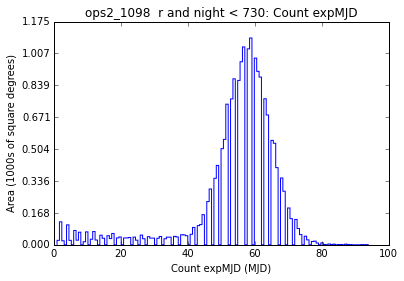

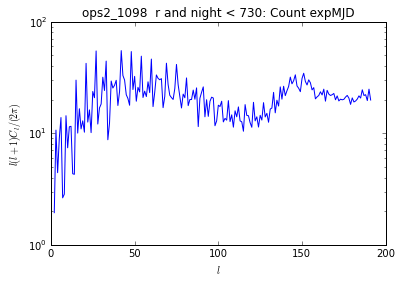

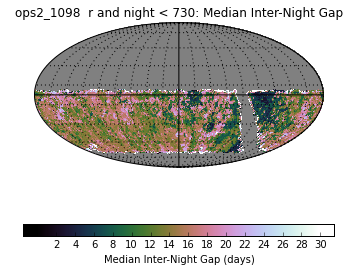

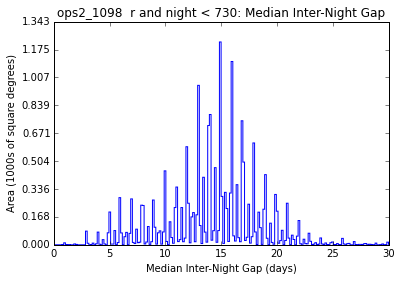

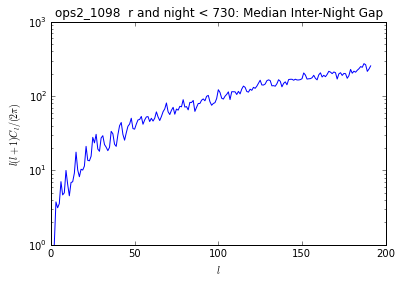

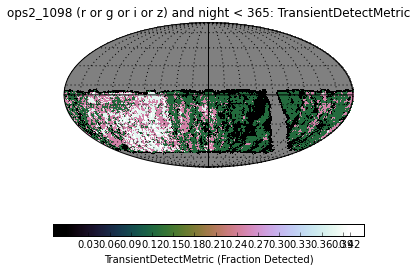

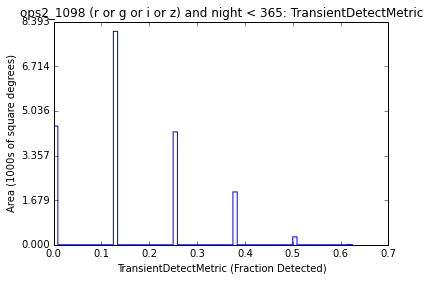

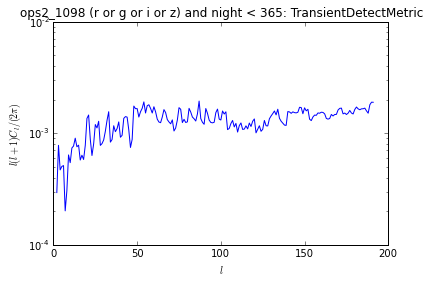

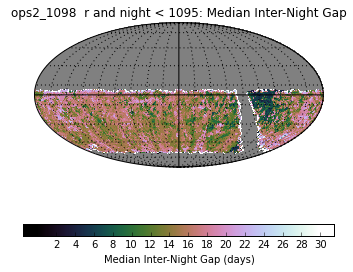

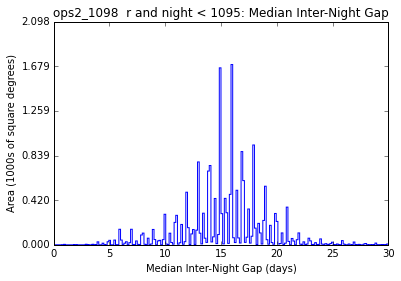

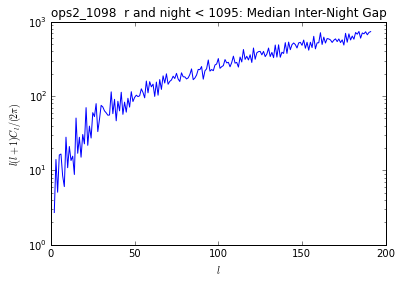

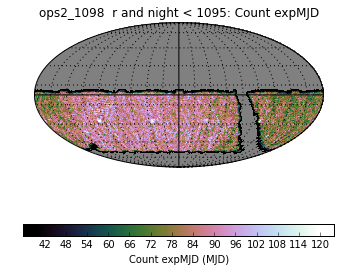

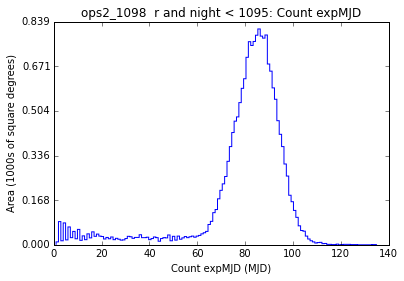

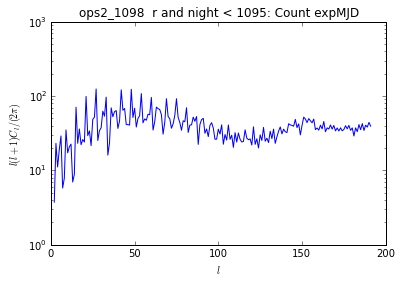

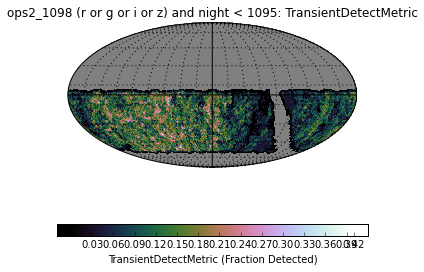

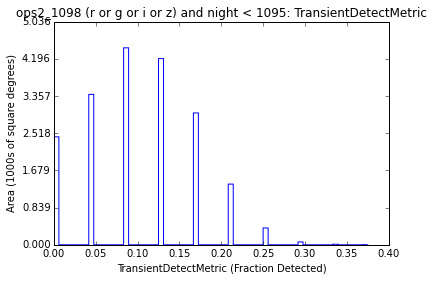

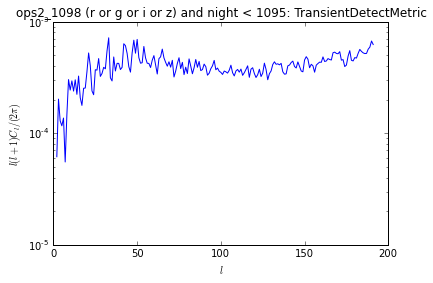

In [6]:
bg.runAll()
bg.plotAll(closefigs=False)

In [7]:
for bundle in bundleList:
    if len(bundle.summaryValues) > 0:
        print bundle.sqlconstraint, bundle.summaryValues

filter = "r" and night < 365 {'Median': 27.0}
filter = "r" and night < 730 {'Median': 57.0}
filter = "r" and night < 1095 {'Median': 84.0}
filter = "r" and night < 3653 {'Median': 269.0}


In [8]:
dbFile = 'enigma_1260_sqlite.db' # Cheese2
opsimdb = utils.connectOpsimDb(dbFile)
bundleList = []
plotDict ={}
sm = metrics.MedianMetric()
runName='enigma_1260'
for night,pd in zip(nightLimits,pdL):
    metric = metrics.CountMetric(col='expMJD')
    slicer = slicers.HealpixSlicer(nside=nside,lonCol='ditheredRA',latCol='ditheredDec')
    sql = 'filter = "r" and night < %i' % night
    bundleList.append(metricBundles.MetricBundle(metric,slicer,sql, plotDict=pd, 
                                                 runName=runName, summaryMetrics=sm))
    metric = metrics.InterNightGapsMetric(metricName='Median Inter-Night Gap')
    bundleList.append(metricBundles.MetricBundle(metric,slicer,sql, runName=runName,
                                                 plotDict={'colorMin':0,'colorMax':30, 'xMin':0,'xMax':30}))
    
    metric = metrics.TransientMetric(riseSlope= -2./peakTime, declineSlope=1.4/30., 
                                      transDuration=transDuration, peakTime=peakTime, surveyDuration=night/365.25, 
                                      nFilters=3, nPrePeak=3, nPerLC=2, **peaks)
    sql = '(filter="r" or filter="g" or filter="i" or filter="z") and night < %i' % (night)
    bundleList.append(metricBundles.MetricBundle(metric,slicer,sql, runName=runName,
                                                 plotDict={'colorMin':0,'colorMax':0.4}))
    
bd = metricBundles.makeBundlesDictFromList(bundleList)
bg =  metricBundles.MetricBundleGroup(bd, opsimdb,
                                      outDir=outDir, resultsDb=resultsDb)

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


Querying database with constraint (filter="r" or filter="g" or filter="i" or filter="z") and night < 730
Found 340299 visits
Running:  ['enigma_1260_TransientDetectMetric_r_or_g_or_i_or_z_and_night_lt_730_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database with constraint filter = "r" and night < 3653
Found 469113 visits
Running:  ['enigma_1260_Median_Inter-Night_Gap_r_and_night_lt_3653_HEAL', 'enigma_1260_Count_expMJD_r_and_night_lt_3653_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database with constraint (filter="r" or filter="g" or filter="i" or filter="z") and night < 3653
Found 1653479 visits
Running:  ['enigma_1260_TransientDetectMetric_r_or_g_or_i_or_z_and_night_lt_3653_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database with constraint filter = "r" and night < 365
Found 47053 visits
Runn

Optimal bin calculation tried to make 6825 bins, returning 200
Optimal bin calculation tried to make 316 bins, returning 200



monopole: 18.3631  dipole: lon: 114.628, lat: -12.1613, amp: 2.16952
Plotting complete.
Plotting figures with filter = "r" and night < 730 sqlconstraint now.
monopole: 21.7308  dipole: lon: -123.775, lat: -23.8745, amp: 2.20322
monopole: 43.0799  dipole: lon: 77.743, lat: -66.0591, amp: 12.2677
Plotting complete.
Plotting figures with (filter="r" or filter="g" or filter="i" or filter="z") and night < 365 sqlconstraint now.
monopole: 0.0727945  dipole: lon: 88.751, lat: -19.0335, amp: 0.0507842
Plotting complete.

Optimal bin calculation tried to make 795 bins, returning 200
Optimal bin calculation tried to make 1329 bins, returning 200



Plotting figures with filter = "r" and night < 1095 sqlconstraint now.
monopole: 23.8491  dipole: lon: -112.637, lat: 16.8312, amp: 3.44967
monopole: 63.4868  dipole: lon: 68.8708, lat: -68.0637, amp: 19.0483
Plotting complete.
Plotting figures with (filter="r" or filter="g" or filter="i" or filter="z") and night < 1095 sqlconstraint now.
monopole: 0.0488714  dipole: lon: 85.3625, lat: -30.2937, amp: 0.0220857
Plotting complete.


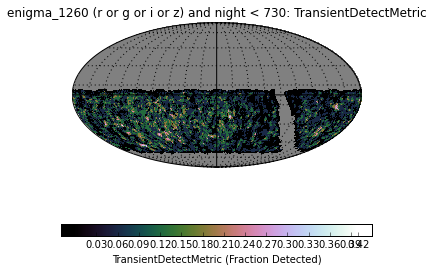

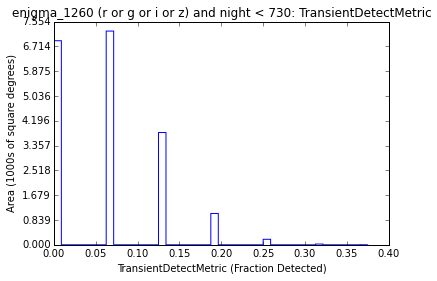

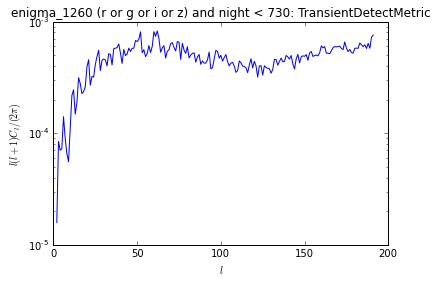

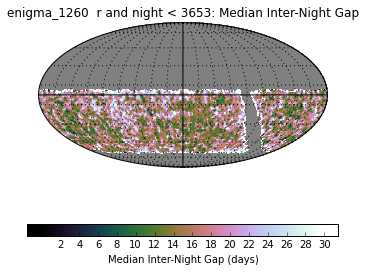

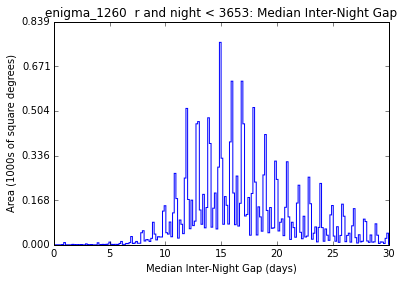

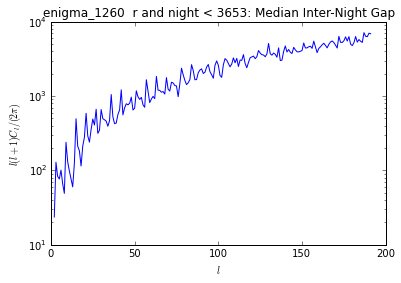

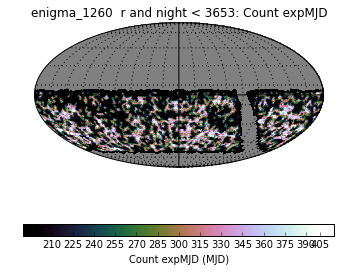

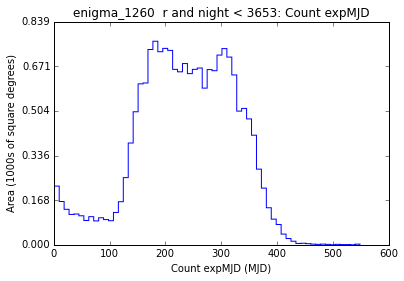

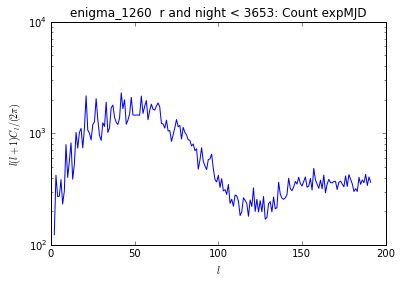

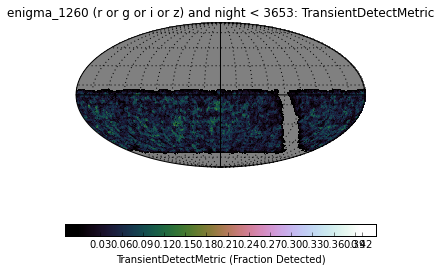

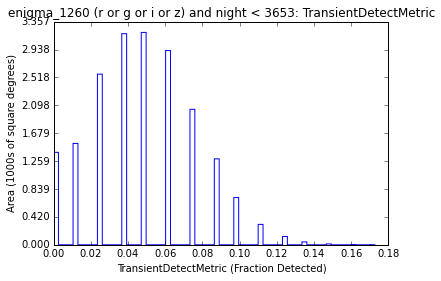

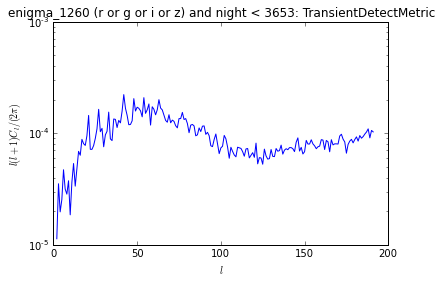

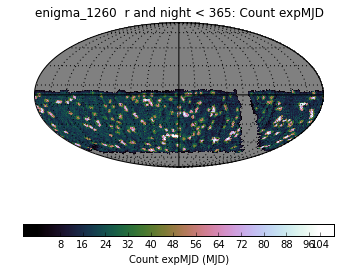

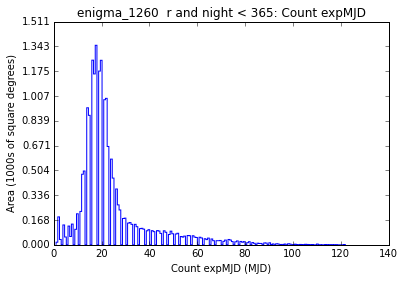

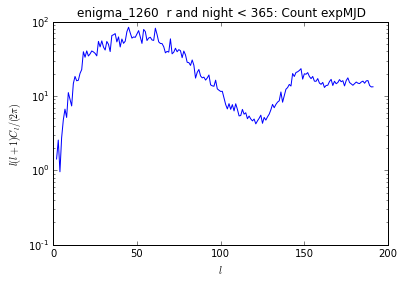

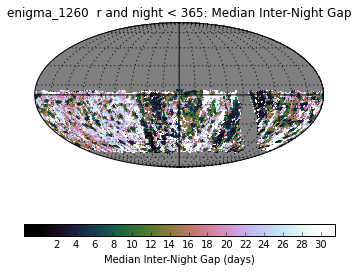

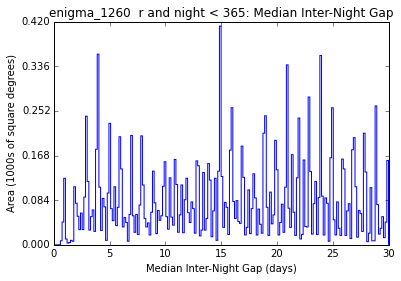

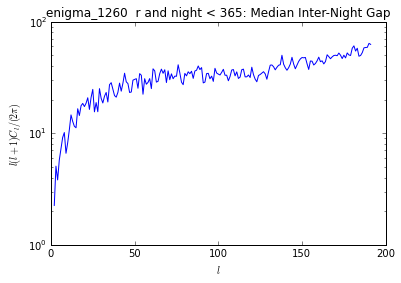

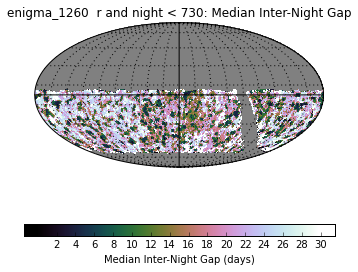

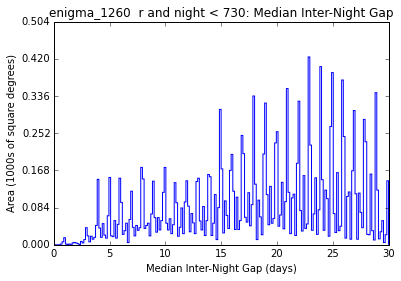

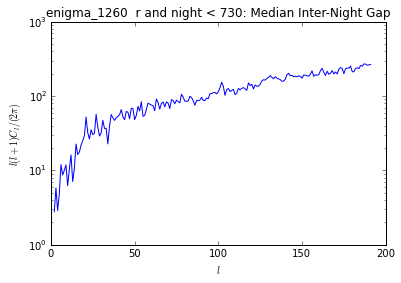

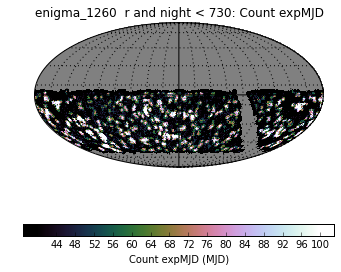

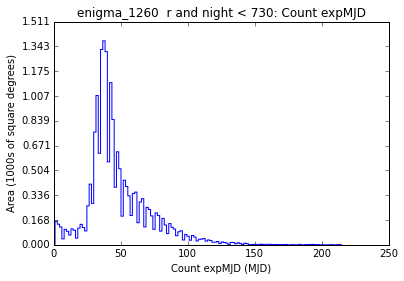

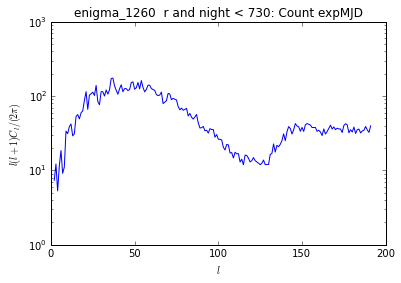

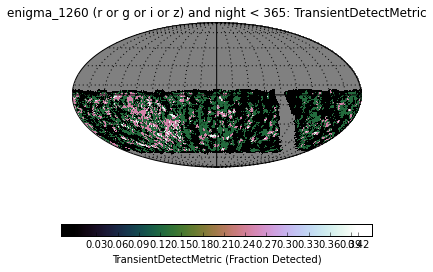

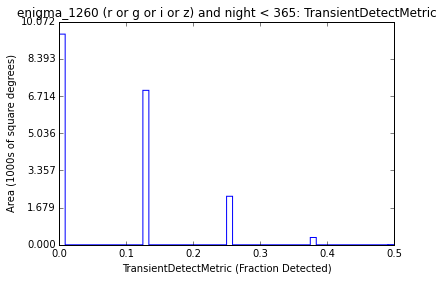

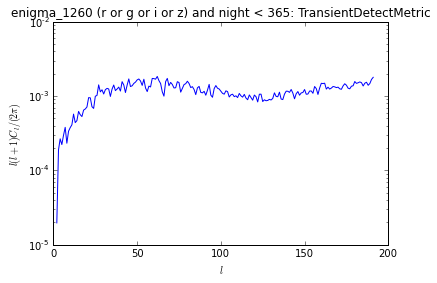

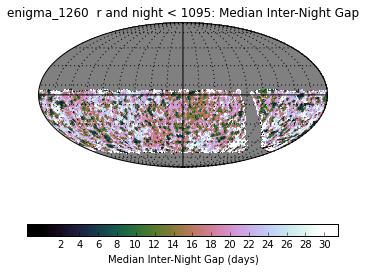

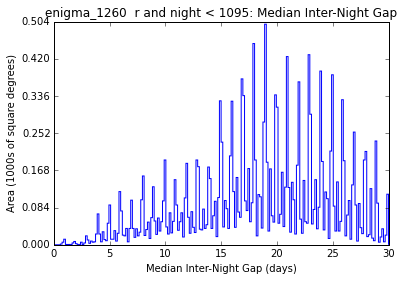

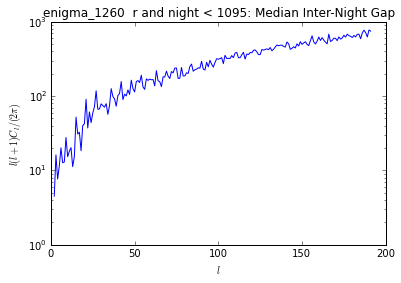

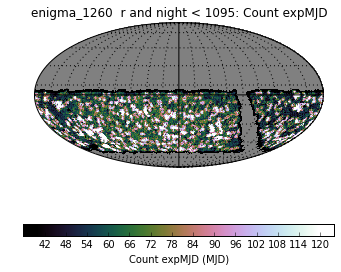

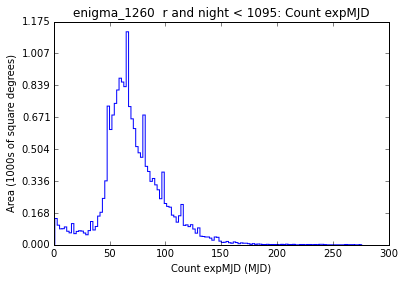

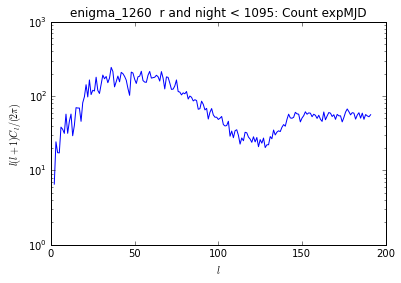

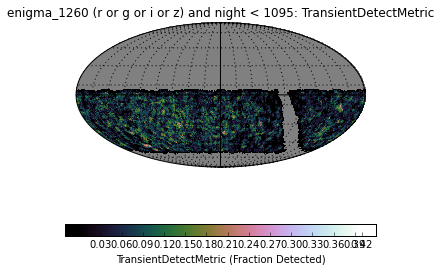

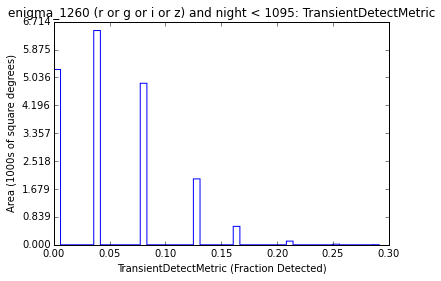

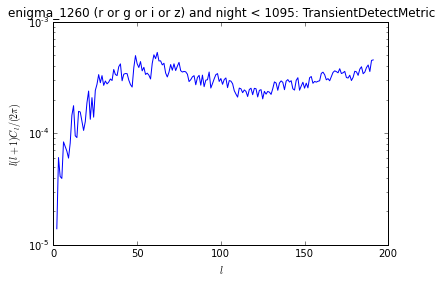

In [9]:
bg.runAll()
bg.plotAll(closefigs=False)

In [10]:
for bundle in bundleList:
    if len(bundle.summaryValues) > 0:
        print bundle.sqlconstraint, bundle.summaryValues

filter = "r" and night < 365 {'Median': 20.0}
filter = "r" and night < 730 {'Median': 42.0}
filter = "r" and night < 1095 {'Median': 67.0}
filter = "r" and night < 3653 {'Median': 238.0}
